In [1]:
import numpy as np 
import pandas as pd 
import datetime
import math

In [2]:
df = pd.read_csv(r"D:\MCA\RBL\Final paper\new RBL\MY paper\Data\BRITANNIA.csv", parse_dates = ['Date'], index_col = 'Date')
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BRITANNIA,EQ,703.25,705.00,759.50,705.0,758.0,756.90,741.01,7512,5.566488e+11,NaN,NaN,NaN
2000-01-04,BRITANNIA,EQ,756.90,710.00,770.00,710.0,740.0,754.55,742.52,8135,6.040391e+11,NaN,NaN,NaN
2000-01-05,BRITANNIA,EQ,754.55,755.00,759.00,705.0,740.0,735.30,739.92,6095,4.509784e+11,NaN,NaN,NaN
2000-01-06,BRITANNIA,EQ,735.30,740.00,794.15,740.0,770.0,785.65,788.83,19697,1.553756e+12,NaN,NaN,NaN
2000-01-07,BRITANNIA,EQ,785.65,808.00,848.50,798.0,848.5,848.50,827.53,33107,2.739708e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,BRITANNIA,EQ,3650.30,3661.10,3662.00,3531.0,3546.0,3539.20,3558.62,1031406,3.670382e+14,72258.0,507276.0,0.4918
2021-04-27,BRITANNIA,EQ,3539.20,3572.70,3574.60,3517.0,3546.0,3541.20,3539.42,813608,2.879697e+14,46189.0,322686.0,0.3966
2021-04-28,BRITANNIA,EQ,3541.20,3488.00,3527.00,3469.0,3470.0,3478.75,3495.13,1498181,5.236339e+14,97170.0,763715.0,0.5098


In [3]:
print('First Trade observation date: %s \nLast Trade observation date: %s' % (df.index[0].date(), df.index[-1].date()))


First Trade observation date: 2000-01-03 
Last Trade observation date: 2021-04-30


In [6]:
df.isnull().sum()


Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2849
Deliverable Volume     509
%Deliverble            509
dtype: int64

In [7]:
df = df.loc[:, ~df.columns.isin(['Series','Trades', 'Deliverable Volume', '%Deliverble'])]
df

,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,,
2000-01-03,BRITANNIA,703.25,705.00,759.50,705.0,758.0,756.90,741.01,7512,5.566488e+11
2000-01-04,BRITANNIA,756.90,710.00,770.00,710.0,740.0,754.55,742.52,8135,6.040391e+11
2000-01-05,BRITANNIA,754.55,755.00,759.00,705.0,740.0,735.30,739.92,6095,4.509784e+11
2000-01-06,BRITANNIA,735.30,740.00,794.15,740.0,770.0,785.65,788.83,19697,1.553756e+12
2000-01-07,BRITANNIA,785.65,808.00,848.50,798.0,848.5,848.50,827.53,33107,2.739708e+12
...,...,...,...,...,...,...,...,...,...,...
2021-04-26,BRITANNIA,3650.30,3661.10,3662.00,3531.0,3546.0,3539.20,3558.62,1031406,3.670382e+14
2021-04-27,BRITANNIA,3539.20,3572.70,3574.60,3517.0,3546.0,3541.20,3539.42,813608,2.879697e+14
2021-04-28,BRITANNIA,3541.20,3488.00,3527.00,3469.0,3470.0,3478.75,3495.13,1498181,5.236339e+14


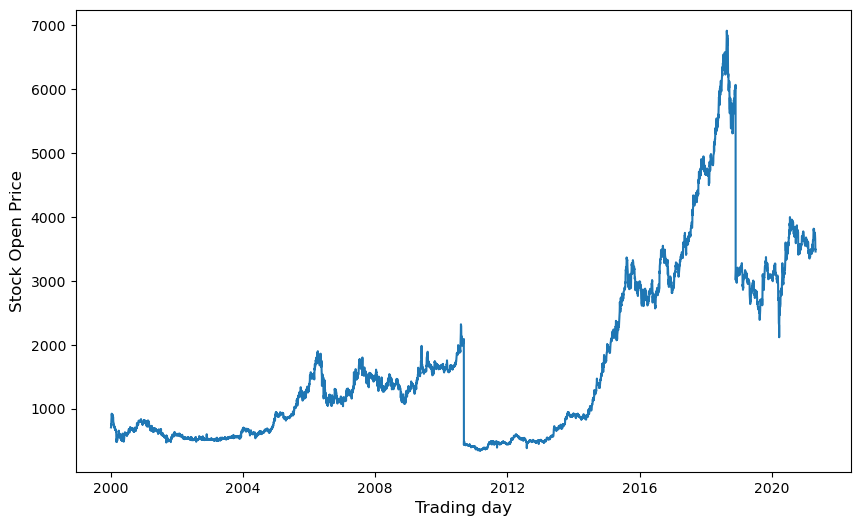

In [8]:
from matplotlib import pyplot as plt
# Define a function to draw time_series plot
def timeseries (x_axis, y_axis, x_label, y_label):
    plt.figure(figsize = (10, 6))
    plt.plot(x_axis, y_axis)
    #plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label, {'fontsize': 12})
    plt.ylabel(y_label, {'fontsize': 12})

timeseries(df.index, df['Open'], 'Trading day', 'Stock Open Price')

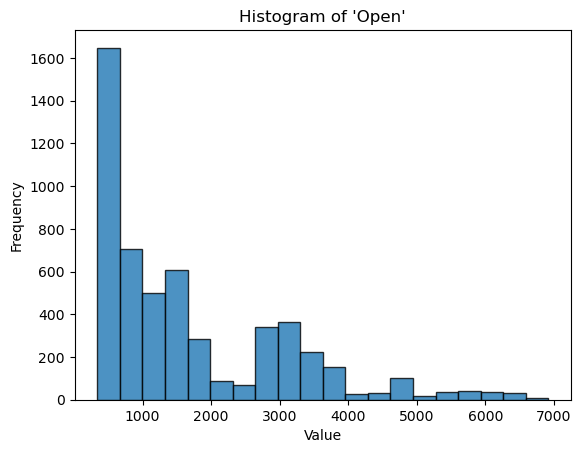

In [9]:
def plot_histogram(x):
    plt.hist(x, bins = 20, alpha=0.8, edgecolor = 'black')
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plot_histogram(df['Open'])

Dimension of train data:  (2069, 10)
Dimension of test data:  (849, 10)


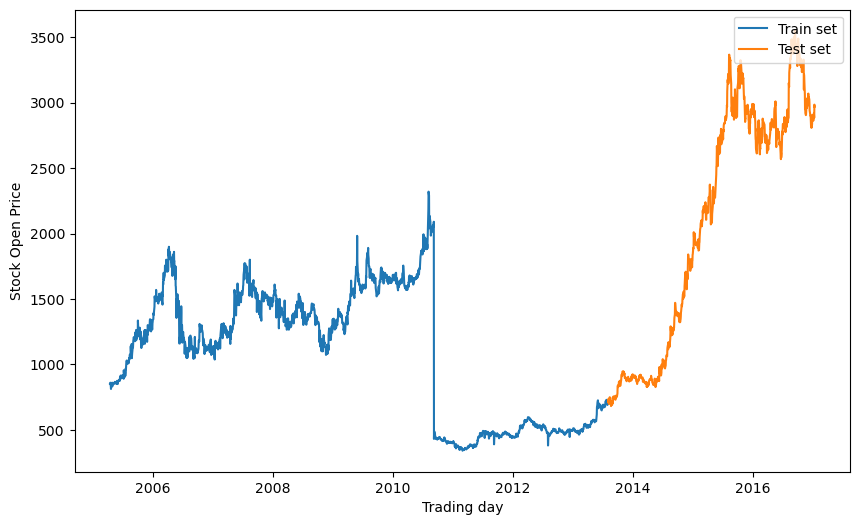

In [10]:
train_size = int(len(df)*0.8)
train_size1 = int(len(df)*0.64)
train_size2 = int(len(df)*0.25)
train_dataset, test_dataset = df.iloc[train_size2:train_size1], df.iloc[train_size1:train_size]

# Plot train and test data
plt.figure(figsize = (10, 6))
plt.plot(train_dataset.Open)
plt.plot(test_dataset.Open)
plt.xlabel('Trading day')
plt.ylabel('Stock Open Price')
plt.legend(['Train set', 'Test set'], loc='upper right')
#plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/2.jpg', format='jpg', dpi=1000)

print('Dimension of train data: ',train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

In [11]:
# Split train data to X and y
X_train = train_dataset.drop('Open', axis = 1)
y_train = train_dataset.loc[:,['Open']]

# Split test data to X and y
test_x = test_dataset.drop('Open', axis = 1)
test_y = test_dataset.loc[:,['Open']]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5305 entries, 2000-01-03 to 2021-04-30
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      5305 non-null   object 
 1   Prev Close  5305 non-null   float64
 2   Open        5305 non-null   float64
 3   High        5305 non-null   float64
 4   Low         5305 non-null   float64
 5   Last        5305 non-null   float64
 6   Close       5305 non-null   float64
 7   VWAP        5305 non-null   float64
 8   Volume      5305 non-null   int64  
 9   Turnover    5305 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 455.9+ KB


In [13]:
#Good rule of thumb is that normalized data lead to better performance in Neural Networks. I used MinMaxScaler from sklearn.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Turnover']
df[numerical_cols] = MinMaxScaler().fit_transform(df[numerical_cols])

train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

X_train = train_data.drop(columns=[ 'Symbol'] + numerical_cols)
y_train = train_data['Open']
X_test = test_data.drop(columns=[ 'Symbol'] + numerical_cols)
y_test = test_data['Open']

scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

train_x_norm = scaler_x.fit_transform(X_train)
train_y_norm = scaler_y.fit_transform(y_train.values.reshape(-1, 1)) # convert to numpy array and reshape
test_x_norm = scaler_x.transform(X_test)
test_y_norm = scaler_y.transform(y_test.values.reshape(-1, 1))

C:\Users\varun\AppData\Local\Temp\ipykernel_35204\3320646368.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols] = MinMaxScaler().fit_transform(df[numerical_cols])


In [14]:
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
        
    return np.array(Xs), np.array(ys)


TIME_STEPS = 30

X_test, y_test = create_dataset(test_x_norm, test_y_norm, TIME_STEPS)
X_train, y_train = create_dataset(train_x_norm, train_y_norm, TIME_STEPS)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_test.shape)

X_train.shape:  (4214, 30, 3)
y_train.shape:  (4214, 1)
X_test.shape:  (1031, 30, 3)
y_test.shape:  (1031, 1)


In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

# Create BiLSTM model, no of neurons is imput
def create_model_bilstm(units):
    model = Sequential()
    # First layer of BiLSTM
    model.add(Bidirectional(LSTM(units = units, return_sequences=True), 
                            input_shape=(X_train.shape[1], X_train.shape[2])))
    # Second layer of BiLSTM
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model


# Create LSTM model, Input is neurons and model type
def create_model(units, m):
    model = Sequential()
    # First layer of LSTM
    model.add(m (units = units, return_sequences = True, 
                 input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Second layer of LSTM
    model.add(m (units = units))                 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model


# BiLSTM
model_bilstm = create_model_bilstm(64)
model_lstm = create_model(64, LSTM)

In [16]:
# Fit BiLSTM and LSTM
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                   patience = 10)

    # shuffle = False because the order of the data matters
    history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2,
                    batch_size = 32, shuffle = False, callbacks = [early_stop])
    return history

print("BI- DIRECTIONAL LSTM OUTPUT.")
history_bilstm = fit_model(model_bilstm)
print()
print("LSTM OUTPUT.")
history_lstm = fit_model(model_lstm)


BI- DIRECTIONAL LSTM OUTPUT.
Epoch 1/100
106/106 [==============================] - 10s 43ms/step - loss: 0.0020 - val_loss: 0.0747
Epoch 2/100
106/106 [==============================] - 3s 28ms/step - loss: 0.0021 - val_loss: 0.0941
Epoch 3/100
106/106 [==============================] - 3s 29ms/step - loss: 0.0022 - val_loss: 0.0645
Epoch 4/100
106/106 [==============================] - 3s 27ms/step - loss: 0.0011 - val_loss: 0.0228
Epoch 5/100
106/106 [==============================] - 3s 28ms/step - loss: 4.0039e-04 - val_loss: 0.0263
Epoch 6/100
106/106 [==============================] - 3s 27ms/step - loss: 3.8925e-04 - val_loss: 0.0324
Epoch 7/100
106/106 [==============================] - 3s 28ms/step - loss: 4.4993e-04 - val_loss: 0.0348
Epoch 8/100
106/106 [==============================] - 3s 28ms/step - loss: 4.9780e-04 - val_loss: 0.0331
Epoch 9/100
106/106 [==============================] - 3s 30ms/step - loss: 5.0285e-04 - val_loss: 0.0303
Epoch 10/100
106/106 [==========

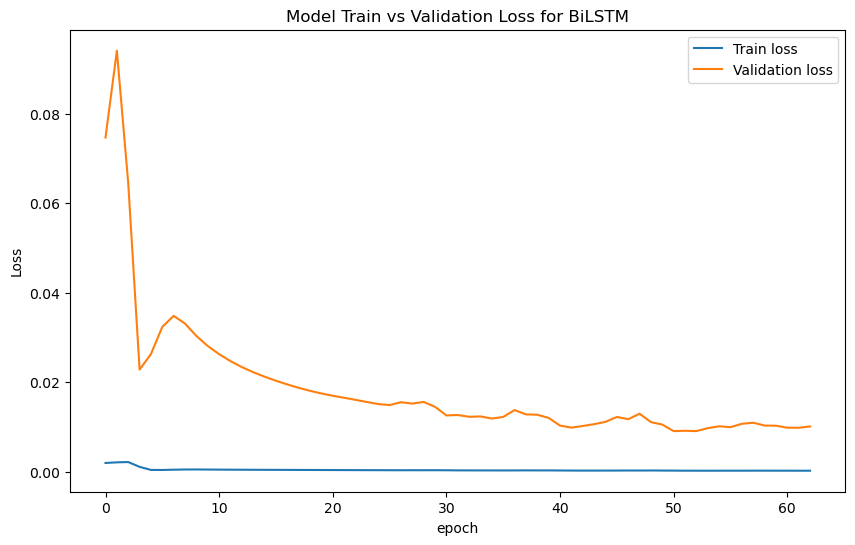

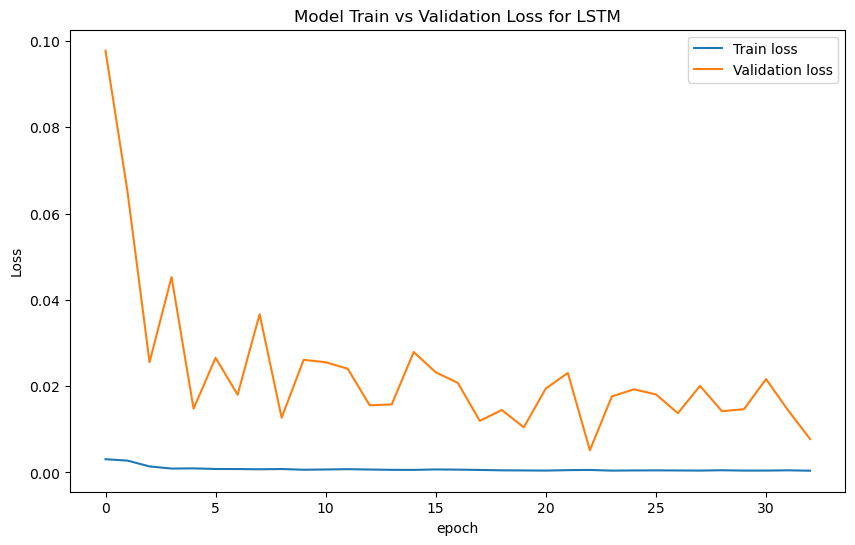

In [17]:
#Plot train loss vs validation loss
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    #plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/loss_'+model_name+'.jpg', format='jpg', dpi=1000)

plot_loss (history_bilstm, 'BiLSTM')
plot_loss (history_lstm, 'LSTM')

In [18]:
#After building the model, I have to transform the target variable back to original data space for train and test data using scaler_y.inverse_transform.
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

In [19]:
#make prediction using BiLSTM and LSTM 
def prediction(model):
    prediction = model.predict(X_test)
    #model predicted values will be scaled values and we need to transform to actual stock values
    prediction = scaler_y.inverse_transform(prediction)
    return prediction

prediction_bilstm = prediction(model_bilstm)
prediction_lstm = prediction(model_lstm)

33/33 [==============================] - 2s 10ms/step


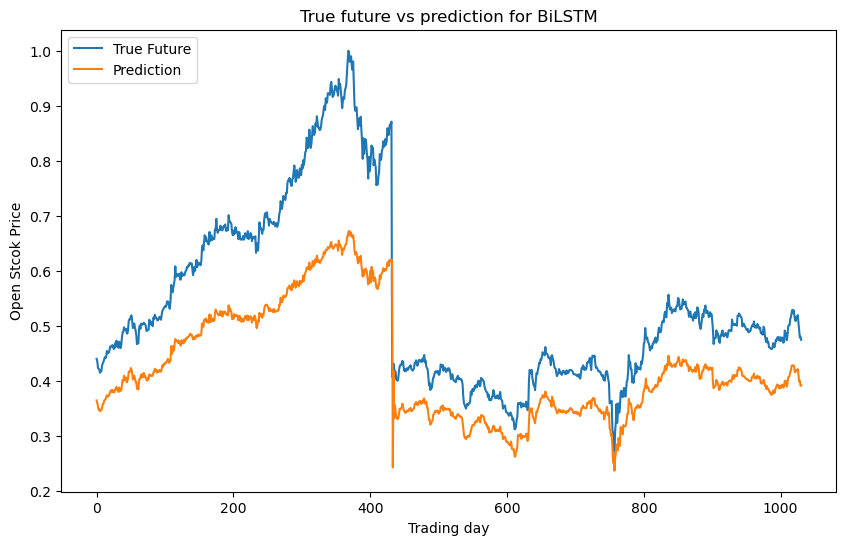

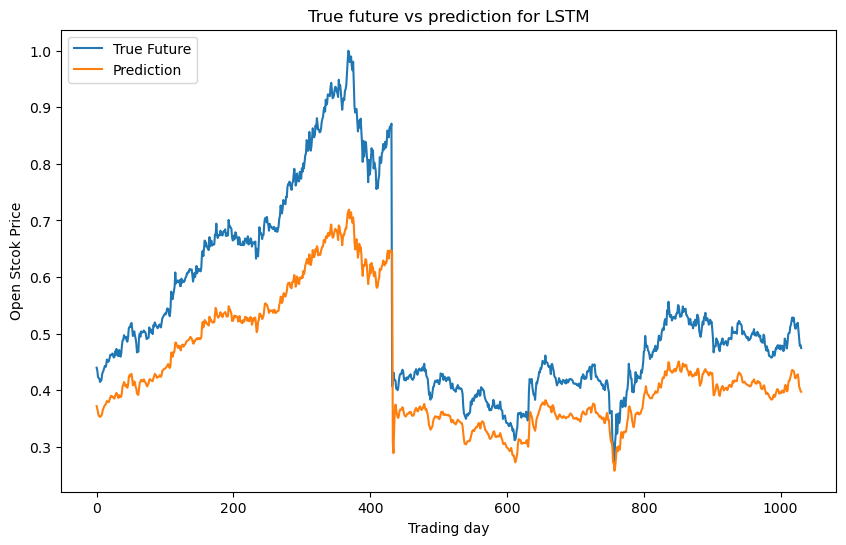

In [20]:
#Plot true future vs prediction¶
def plot_future(prediction, model_name, y_test):
    
    plt.figure(figsize=(10, 6))
    
    range_future = len(prediction)

    plt.plot(np.arange(range_future), np.array(y_test), label='True Future')
    plt.plot(np.arange(range_future), np.array(prediction),label='Prediction')

    plt.title('True future vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Trading day')
    plt.ylabel('Open Stcok Price')
    #plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/predic_'+model_name+'.jpg', format='jpg', dpi=1000)
    
    
plot_future(prediction_bilstm, 'BiLSTM', y_test)
plot_future(prediction_lstm, 'LSTM', y_test)


In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return rmse, mae, r2, mse

# Calculate metrics for Bi-LSTM
rmse_bilstm, mae_bilstm, r2_bilstm, mse_bilstm = calculate_metrics(y_test, prediction_bilstm)
print("Bi-LSTM Metrics:")
print("RMSE:", rmse_bilstm)
print("MAE:", mae_bilstm)
print("R2 Score:", r2_bilstm)
print("MSE:", mse_bilstm)
print()

# Calculate metrics for LSTM
rmse_lstm, mae_lstm, r2_lstm, mse_lstm = calculate_metrics(y_test, prediction_lstm)
print("LSTM Metrics:")
print("RMSE:", rmse_lstm)
print("MAE:", mae_lstm)
print("R2 Score:", r2_lstm)
print("MSE:", mse_lstm)


Bi-LSTM Metrics:
RMSE: 0.13035415471561365
MAE: 0.11455580531794783
R2 Score: 0.347145807095423
MSE: 0.016992205651622138

LSTM Metrics:
RMSE: 0.11766653061823605
MAE: 0.10357178645379256
R2 Score: 0.4680481309337695
MSE: 0.013845412427732283
